In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate

# $\rho(z)$ of a grating

Text(0.5, 0, '$z$')

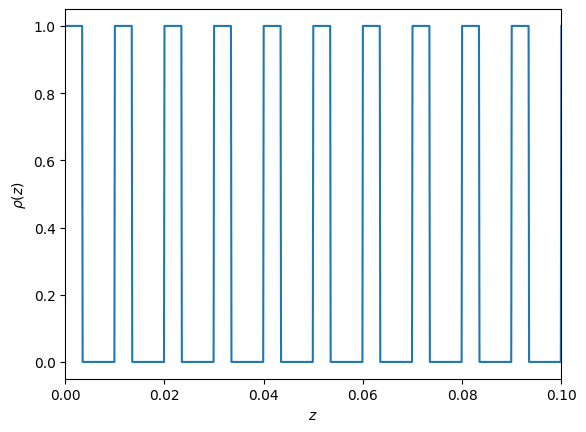

In [2]:
def rho_f(z):
    spatial_period = 0.01
    return (0.5 + 0.5 * signal.square(2 * np.pi * z / spatial_period, duty = 0.35))
    
N = 10000
l = 1
z_0 = 0
z_1 = l
z = np.linspace(z_0,z_1,N)
dz = z[1] - z[0]

rho = rho_f(z)
plt.xlim(z_0,z_1 * 0.1)
plt.plot(z,rho)
plt.ylabel(r'$\rho(z)$')
plt.xlabel(r'$z$')

# $\Delta\rho(z)$ from $\rho(z)$ and $\phi$

Text(0.5, 0, '$z$')

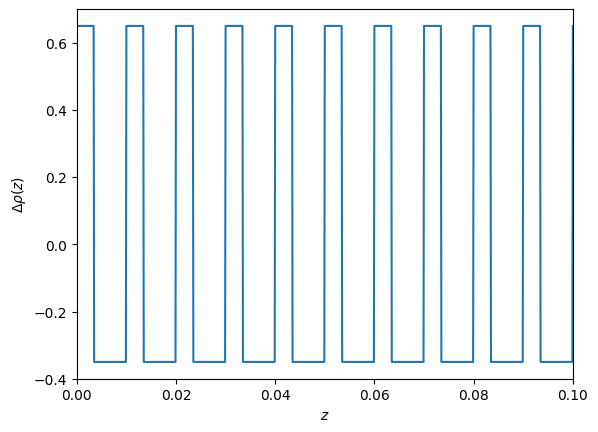

In [3]:
V = l
phi = integrate.trapezoid(rho) * dz/V
delta_rho = rho - phi
plt.xlim(z_0,z_1 * 0.1)
plt.plot(z,delta_rho)
plt.ylabel(r'$\Delta\rho(z)$')
plt.xlabel(r'$z$')

# Verification of equation (5)

In [4]:
ms_fluctuation = V * phi * (1 - phi)
integrate.trapezoid(delta_rho ** 2*dz) == ms_fluctuation

False

# $\gamma(z)$ from $\Delta \rho(z)$

In [5]:
def wrapping_correlation(delta_rho):
    double_delta_rho = np.concatenate((delta_rho, delta_rho))
    return signal.correlate(delta_rho, double_delta_rho * dz, mode='valid')

Text(0.5, 0, '$z$')

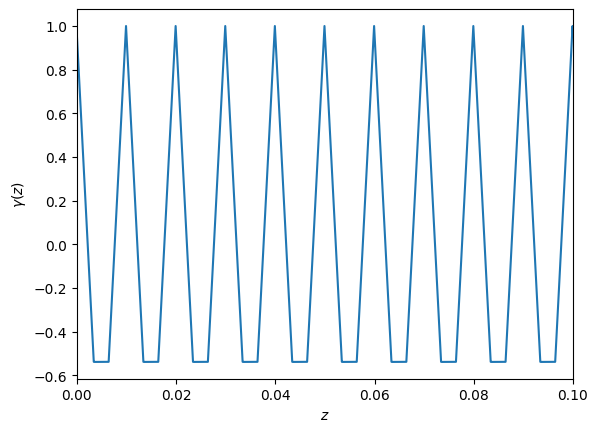

In [23]:
gamma =wrapping_correlation(delta_rho)/ms_fluctuation
half_len = len(gamma)//2
# Spin echo length!
Z = np.linspace(0,half_len * dz,half_len)
plt.xlim(z_0,z_1 * 0.1)

plt.plot(Z,gamma[half_len:-1])
plt.ylabel(r'$\gamma(z)$')
plt.xlabel(r'$z$')

# $G(z)$ from $\gamma(z)$ and $\xi$
The calculation here is left as a stub for more general cases, in fact for this geometry $G(z) = \gamma(z)$

Text(0.5, 0, '$z$')

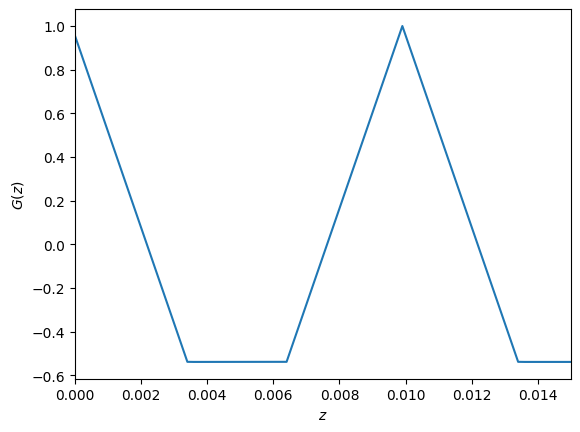

In [7]:
# t is the thickness along the x-axis of the grating
t = 2
# The characteristic length xi
c_l = 2 * t
G = gamma
# G = 0.5 * gamma + 0.5 # TODO: figure out why this is necessary
plt.xlim(z_0,0.015)
plt.plot(Z,G[half_len+1:])
plt.ylabel(r'$G(z)$')
plt.xlabel(r'$z$')

# $P(z)$ from $G(z)$ (single scattering)

Text(0.5, 0, '$z$')

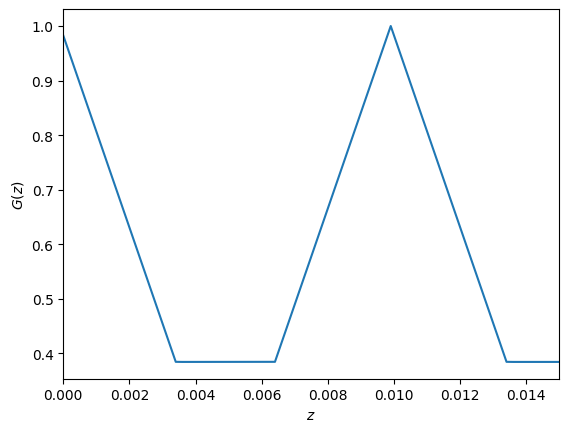

In [8]:
# Total scattering cross-section
s_t = 0.4
P_single = 1 - s_t + s_t * G
plt.xlim(z_0,0.015)
plt.plot(Z,P_single[half_len+1:])
plt.ylabel(r'$G(z)$')
plt.xlabel(r'$z$')

# $P(z)$ from $G(z)$ (multiple scattering)

Text(0.5, 0, '$Z$')

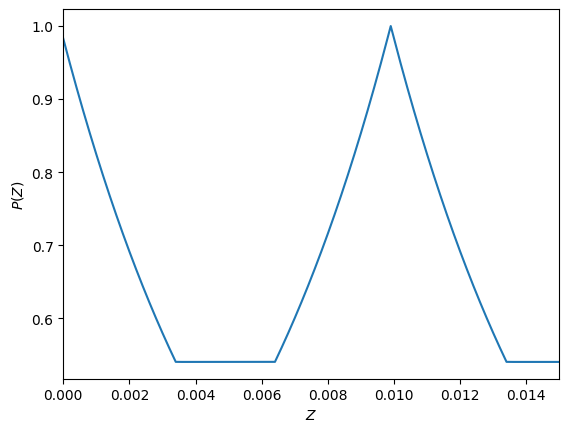

In [9]:
plt.xlim(z_0,0.015)
P_mult = np.exp(-s_t*(1-G[half_len+1:]))
plt. plot(Z,P_mult)
plt.ylabel(r'$P(Z)$')
plt.xlabel(r'$Z$')

# More realistic $P(Z)$ from spread in $\lambda$ and $Z$
In reality, the $Z$ in $P(Z)$ should be considered in the sense of a mean $Z$, $\bar{Z}$, given a $\bar\lambda$. As
$$Z = \frac{c\lambda^2\langle\cot\theta_0\rangle_\alpha}{2\pi}$$
and $\lambda$ will in the best case be distributed in a sharp peak of finite width around $\bar\lambda$, the $P(\bar Z)$ that is measured will be more smeared out and smooth. Let's assume that quantities such as $s_t$ do not depend on $\lambda$ so that different $\lambda$'s will correspond to different horizontal scalings of the above relative to $\bar\lambda$. Then

# Modelling the distribution of $\lambda$

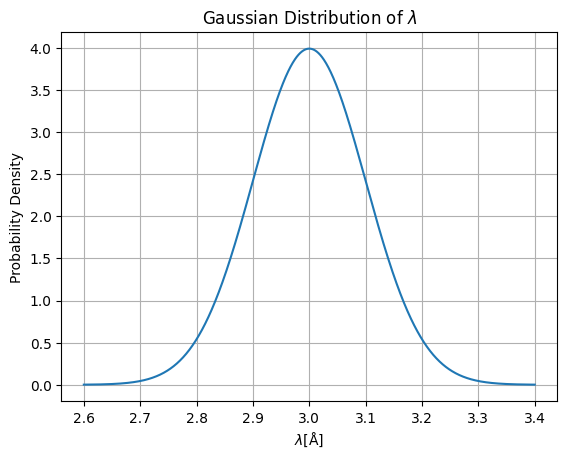

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_wavelength = 3.0  # Mean wavelength
std_dev = 0.1  # Standard deviation

# Create wavelength values
wavelengths = np.linspace(mean_wavelength - 4*std_dev, mean_wavelength + 4*std_dev, 1000)
dlambda = wavelengths[1] - wavelengths[0]

# Calculate Gaussian distribution
gaussian = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-(wavelengths - mean_wavelength)**2 / (2 * std_dev**2))

# Plot Gaussian distribution
plt.plot(wavelengths, gaussian)
plt.title(r'Gaussian Distribution of $\lambda$')
plt.xlabel(r'$\lambda$[Å]')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Adding two wavelengths 

Text(0.5, 0, '$Z$')

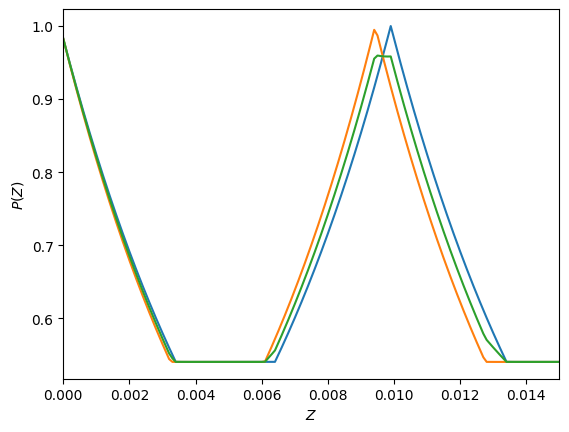

In [20]:
import numpy as np

# Given arrays
z = Z
P_z = P_mult
r = 1.05  # Scaling factor

# Scaled z values
scaled_z = z * r
# Interpolate P_z with scaled z values
scaled_P_z = np.interp(scaled_z, z, P_z)

plt.xlim(z_0,0.015)
plt.plot(z,P_z)
plt.plot(z,scaled_P_z)
plt.plot(z,0.5 * P_z + 0.5*scaled_P_z)
plt.ylabel(r'$P(Z)$')
plt.xlabel(r'$Z$')

# Summing over the distribution of wavelengths

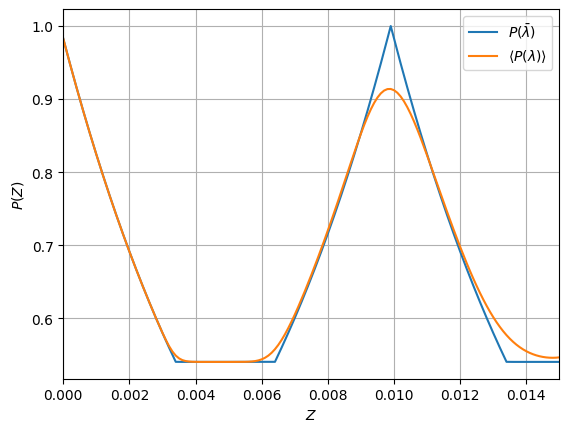

In [21]:
import numpy as np

# Given arrays
z = Z
P_z = P_mult
r = wavelengths / mean_wavelength

final_scaled_P_z = np.zeros_like(z, dtype=float)

for (density, wavelength) in zip(gaussian, wavelengths):
    
    r = (wavelength/mean_wavelength)**2
    final_scaled_P_z += density*np.interp(z * r, z, P_z) * dlambda


plt.xlim(z_0,0.015)
plt.plot(z,P_z, label=r'$P(\bar\lambda)$')
plt.plot(z,final_scaled_P_z, label=r'$\langle P(\lambda)\rangle$')
plt.grid()
plt.ylabel(r'$P(Z)$')
plt.xlabel(r'$Z$')
plt.legend()
